<a href="https://colab.research.google.com/github/hectorpilo/bootcamp-ds-sonda/blob/main/Hearth_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Heart Disease - Machine Learning Training Using XGB**


---

The Goal is to predict the presence of heart disease based on these risk factors.

## 📝 Column Descriptions – Heart Disease Dataset

This dataset contains medical information used to predict the presence of heart disease. Below is a description of each column:

| Column      | Description                                                                 |
|-------------|-----------------------------------------------------------------------------|
| `age`       | Age of the patient (in years).                                              |
| `sex`       | Sex of the patient (0 = female, 1 = male).                                  |
| `cp`        | Chest pain type (categorical: 0–3, indicating different types of angina).   |
| `trestbps`  | Resting blood pressure (in mm Hg) upon admission to the hospital.           |
| `chol`      | Serum cholesterol level (in mg/dl).                                          |
| `fbs`       | Fasting blood sugar > 120 mg/dl (1 = true, 0 = false).                      |
| `restecg`   | Resting electrocardiographic results (categorical: 0–2).                    |
| `thalach`   | Maximum heart rate achieved during the test.                                |
| `exang`     | Exercise-induced angina (1 = yes, 0 = no).                                   |
| `oldpeak`   | ST depression induced by exercise relative to rest.                         |
| `slope`     | The slope of the peak exercise ST segment (categorical: 0–2).               |
| `ca`        | Number of major vessels (0–3) colored by fluoroscopy.                       |
| `thal`      | Thalassemia: 1 = normal, 2 = fixed defect, 3 = reversible defect.            |
| `num`       | Diagnosis of heart disease (0 = no disease, 1–4 = increasing severity).      |
| `dataset`   | Indicates which dataset the row came from (e.g., combined data sources).     |


In [ ]:
from google.colab import drive
drive.mount("/content/drive")
path = "/content/drive/MyDrive/BBDD/heart_disease_uci.csv"
import pandas as pd
df = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **1) Numerical and Graphical Analysis of the Data**

---



**1.1) Dataset Analysis**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [ ]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.00,233.00,True,lv hypertrophy,150.00,False,2.30,downsloping,0.00,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.00,286.00,False,lv hypertrophy,108.00,True,1.50,flat,3.00,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.00,229.00,False,lv hypertrophy,129.00,True,2.60,flat,2.00,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.00,250.00,False,normal,187.00,False,3.50,downsloping,0.00,normal,0
4,5,41,Female,Cleveland,atypical angina,130.00,204.00,False,lv hypertrophy,172.00,False,1.40,upsloping,0.00,normal,0


In [ ]:
# Loop through each column and print unique values
for column in df.columns:
    print(f"🧾 Column: {column}")
    print(df[column].unique())  # Show unique values
    print("-" * 40)
unique_counts = df.nunique()

🧾 Column: id
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 2

In [ ]:
missing_info = pd.DataFrame({
    'Missing Values': df.isnull().sum(),
    'Percentage': df.isnull().mean() * 100,
    'Dtype': df.dtypes  # Nueva columna con el tipo de dato
})

# Filtrar solo columnas con al menos un valor nulo
missing_info = missing_info[missing_info['Missing Values'] > 0]

# Mostrar el resultado
missing_info

,Missing Values,Percentage,Dtype
trestbps,59,6.41,float64
chol,30,3.26,float64
fbs,90,9.78,object
restecg,2,0.22,object
thalch,55,5.98,float64
exang,55,5.98,object
oldpeak,62,6.74,float64
slope,309,33.59,object
ca,611,66.41,float64
thal,486,52.83,object


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,920.00,460.50,265.73,1.00,230.75,460.50,690.25,920.00
age,920.00,53.51,9.42,28.00,47.00,54.00,60.00,77.00
trestbps,861.00,132.13,19.07,0.00,120.00,130.00,140.00,200.00
chol,890.00,199.13,110.78,0.00,175.00,223.00,268.00,603.00
thalch,865.00,137.55,25.93,60.00,120.00,140.00,157.00,202.00
oldpeak,858.00,0.88,1.09,-2.60,0.00,0.50,1.50,6.20
ca,309.00,0.68,0.94,0.00,0.00,0.00,1.00,3.00
num,920.00,1.00,1.14,0.00,0.00,1.00,2.00,4.00


In [ ]:
# Make a copy of the original DataFrame to preserve the raw data
df_cleaned = df.copy()

# Drop columns that are not useful for analysis or modeling
# 'id' is just an identifier, and 'dataset' only indicates data origin
df_cleaned.drop(columns=['id', 'dataset'], inplace=True)

# Preview the cleaned DataFrame
df_cleaned.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.00,233.00,True,lv hypertrophy,150.00,False,2.30,downsloping,0.00,fixed defect,0
1,67,Male,asymptomatic,160.00,286.00,False,lv hypertrophy,108.00,True,1.50,flat,3.00,normal,2
2,67,Male,asymptomatic,120.00,229.00,False,lv hypertrophy,129.00,True,2.60,flat,2.00,reversable defect,1
3,37,Male,non-anginal,130.00,250.00,False,normal,187.00,False,3.50,downsloping,0.00,normal,0
4,41,Female,atypical angina,130.00,204.00,False,lv hypertrophy,172.00,False,1.40,upsloping,0.00,normal,0


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   cp        920 non-null    object 
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    object 
 6   restecg   918 non-null    object 
 7   thalch    865 non-null    float64
 8   exang     865 non-null    object 
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    object 
 11  ca        309 non-null    float64
 12  thal      434 non-null    object 
 13  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 100.8+ KB


In [ ]:
missing_info = pd.DataFrame({
    'Missing Values': df_cleaned.isnull().sum(),
    'Percentage': df_cleaned.isnull().mean() * 100,
    'Dtype': df_cleaned.dtypes  # Nueva columna con el tipo de dato
})

# Filtrar solo columnas con al menos un valor nulo
missing_info = missing_info[missing_info['Missing Values'] > 0]

# Mostrar el resultado
missing_info

,Missing Values,Percentage,Dtype
trestbps,59,6.41,float64
chol,30,3.26,float64
fbs,90,9.78,object
restecg,2,0.22,object
thalch,55,5.98,float64
exang,55,5.98,object
oldpeak,62,6.74,float64
slope,309,33.59,object
ca,611,66.41,float64
thal,486,52.83,object


**1.2) Visualizations**

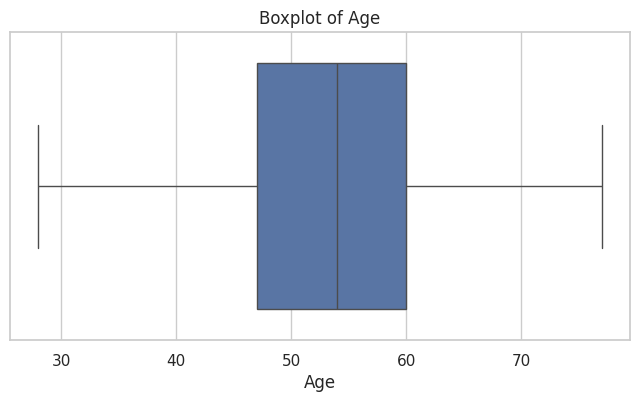

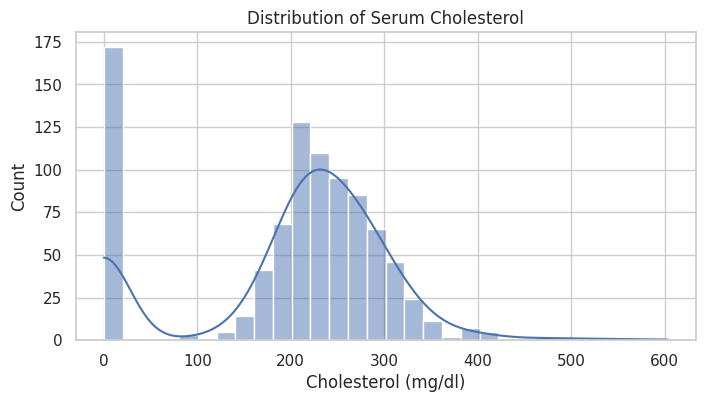

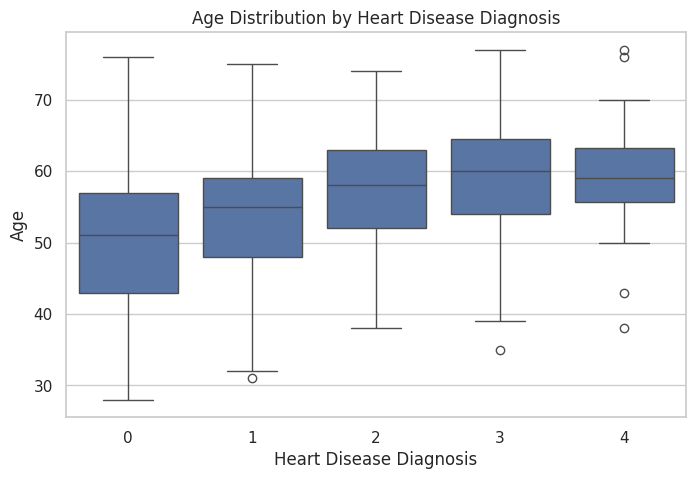

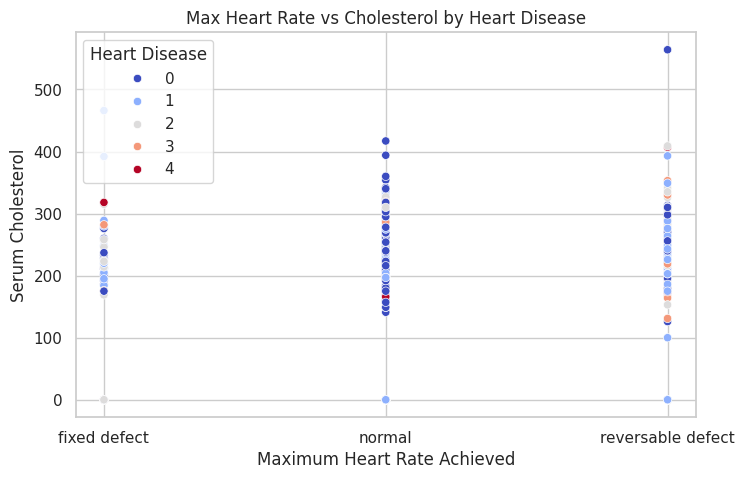

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set visual style
sns.set(style="whitegrid")

# --- UNIVARIATE ANALYSIS ---

# Boxplot for 'age'
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_cleaned['age'])
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

# Histogram for 'chol' (serum cholesterol)
plt.figure(figsize=(8, 4))
sns.histplot(df_cleaned['chol'], kde=True, bins=30)
plt.title('Distribution of Serum Cholesterol')
plt.xlabel('Cholesterol (mg/dl)')
plt.show()


# --- MULTIVARIATE ANALYSIS ---

# Boxplot of 'age' grouped by presence of heart disease (num)
plt.figure(figsize=(8, 5))
sns.boxplot(x='num', y='age', data=df_cleaned)
plt.title('Age Distribution by Heart Disease Diagnosis')
plt.xlabel('Heart Disease Diagnosis')
plt.ylabel('Age')
plt.show()

# Scatter plot: max heart rate vs cholesterol, colored by target
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_cleaned, x='thal', y='chol', hue='num', palette='coolwarm')
plt.title('Max Heart Rate vs Cholesterol by Heart Disease')
plt.xlabel('Maximum Heart Rate Achieved')
plt.ylabel('Serum Cholesterol')
plt.legend(title='Heart Disease')
plt.show()

**1.3) Graphical Conclutions**

---
**Boxplot**
* From this plot, I can see that the age distribution among patients is fairly symmetric, ranging approximately from 29 to 77 years old. The median age seems to be around 55, which means that half of the patients are younger and half are older than that. I notice there's no significant presence of outliers, and the data appears well spread. Because of this, I believe age is a reliable and informative feature to include in any predictive analysis.

**Histogram of Serum Cholesterol**
* Looking at the cholesterol distribution, I notice a right-skewed shape with most values concentrated between 200 and 300 mg/dl. However, what stands out immediately is a spike at 0, which doesn't make sense medically — cholesterol values can't be zero in real patients. This makes me think that those are likely missing or wrongly recorded values. I would consider treating them as missing data before modeling, because they could distort the analysis if left unaddressed.

**Boxplot of Age by Heart Disease Diagnosis**

* This plot shows the relationship between age and the severity of heart disease. I observe that patients without heart disease (category 0) are generally younger, while those with more severe diagnoses (categories 1 to 4) tend to be older. This aligns with what I expected — age increases the risk of cardiovascular issues. The trend is gradual and clear, so I believe age plays an important role in predicting the presence and severity of heart disease.

**Scatter Plot: Max Heart Rate vs Cholesterol by Heart Disease**
* In this last scatter plot, even though the title suggests it's comparing max heart rate and cholesterol, the x-axis actually seems to represent the thal variable (with categories like "normal", "fixed defect", and "reversible defect"). Within each thal category, I see a wide range of cholesterol levels, but again, some values are suspiciously close to 0. This confirms for me that there are data quality issues with the chol variable. Also, I notice that patients with more severe heart disease diagnoses are more concentrated in the fixed and reversible defect groups. That makes me think thal might be a strong indicator to consider when building predictive models.

# **2) Imputation of Missing Values and Outliers**

---



In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   cp        920 non-null    object 
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    object 
 6   restecg   918 non-null    object 
 7   thalch    865 non-null    float64
 8   exang     865 non-null    object 
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    object 
 11  ca        309 non-null    float64
 12  thal      434 non-null    object 
 13  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 100.8+ KB


. Imputación para columnas numéricas (int y float)

In [ ]:
df_imputed = df_cleaned.copy()

In [ ]:
# Columnas numéricas con valores faltantes
num_cols = ['trestbps', 'chol', 'thalch', 'oldpeak']

# Imputación con mediana
df_imputed[num_cols] = df_imputed[num_cols].fillna(df_imputed[num_cols].median())


Imputación para columnas categóricas (tipo object)

In [ ]:
# Columnas categóricas con valores faltantes
cat_cols = ['fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Imputación con moda (valor más frecuente)
for col in cat_cols:
    df_imputed[col] = df_imputed[col].fillna(df_imputed[col].mode()[0])

In [ ]:
# Resumen del nuevo DataFrame imputado
df_imputed.info()

# Estadísticas descriptivas de columnas numéricas
df_imputed.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   cp        920 non-null    object 
 3   trestbps  920 non-null    float64
 4   chol      920 non-null    float64
 5   fbs       920 non-null    bool   
 6   restecg   920 non-null    object 
 7   thalch    920 non-null    float64
 8   exang     920 non-null    bool   
 9   oldpeak   920 non-null    float64
 10  slope     920 non-null    object 
 11  ca        920 non-null    float64
 12  thal      920 non-null    object 
 13  num       920 non-null    int64  
dtypes: bool(2), float64(5), int64(2), object(5)
memory usage: 88.2+ KB


,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.00,920.00,920.00,920.00,920.00,920.00,920.00
mean,53.51,132.00,199.91,137.69,0.85,0.23,1.00
std,9.42,18.45,109.04,25.15,1.06,0.63,1.14
min,28.00,0.00,0.00,60.00,-2.60,0.00,0.00
25%,47.00,120.00,177.75,120.00,0.00,0.00,0.00
50%,54.00,130.00,223.00,140.00,0.50,0.00,1.00
75%,60.00,140.00,267.00,156.00,1.50,0.00,2.00
max,77.00,200.00,603.00,202.00,6.20,3.00,4.00


**About the DataPreparation**

---



For the purposes of practice and to fulfill the requirements of the Bootcamp Data Science course activities, I will perform imputation using the median for numerical columns and the mode for categorical columns. I will also create a dataset by removing all rows with missing values to obtain a fully complete dataset. On this complete dataset, I will train a model — either a regressor or a classifier, depending on the case — so that I can later input the dataset with missing values and generate a fully completed version.

In [ ]:
# STEP 1: Create a new dataset by removing all rows with missing values
# This dataset will be used to train classification and regression models

df_complete = df_cleaned.dropna()

# Display the shape to confirm the reduction in rows
print("Original dataset shape (df_cleaned):", df_cleaned.shape)
print("Complete dataset shape (df_complete):", df_complete.shape)

Original dataset shape (df_cleaned): (920, 14)
Complete dataset shape (df_complete): (299, 14)


In [ ]:
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 748
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       299 non-null    int64  
 1   sex       299 non-null    object 
 2   cp        299 non-null    object 
 3   trestbps  299 non-null    float64
 4   chol      299 non-null    float64
 5   fbs       299 non-null    object 
 6   restecg   299 non-null    object 
 7   thalch    299 non-null    float64
 8   exang     299 non-null    object 
 9   oldpeak   299 non-null    float64
 10  slope     299 non-null    object 
 11  ca        299 non-null    float64
 12  thal      299 non-null    object 
 13  num       299 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 35.0+ KB


In [ ]:
# STEP 2: Identify columns with missing values in the original dataset (df_cleaned)

missing_cols = df_cleaned.columns[df_cleaned.isnull().any()].tolist()
print("🔍 Columns with missing values:", missing_cols)

# Separate them by type (numerical vs categorical)
num_missing = [col for col in missing_cols if df_cleaned[col].dtype in ['float64', 'int64']]
cat_missing = [col for col in missing_cols if df_cleaned[col].dtype == 'object']

print("🧮 Numerical columns with missing values (regression):", num_missing)
print("🔠 Categorical columns with missing values (classification):", cat_missing)

🔍 Columns with missing values: ['trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
🧮 Numerical columns with missing values (regression): ['trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
🔠 Categorical columns with missing values (classification): ['fbs', 'restecg', 'exang', 'slope', 'thal']


 Codificar variables categóricas en df_complete
Antes de entrenar modelos, es necesario convertir las columnas categóricas (object) en variables numéricas, porque los algoritmos de ML no pueden trabajar directamente con texto.

Usaremos Label Encoding para todas las columnas categóricas.

In [ ]:
# STEP 3: Encode categorical columns in df_complete

from sklearn.preprocessing import LabelEncoder

df_encoded = df_complete.copy()
label_encoders = {}

# Encode all object-type columns
for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le  # Store the encoder if we need to decode later

# Confirm the encoding
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 748
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       299 non-null    int64  
 1   sex       299 non-null    int64  
 2   cp        299 non-null    int64  
 3   trestbps  299 non-null    float64
 4   chol      299 non-null    float64
 5   fbs       299 non-null    int64  
 6   restecg   299 non-null    int64  
 7   thalch    299 non-null    float64
 8   exang     299 non-null    int64  
 9   oldpeak   299 non-null    float64
 10  slope     299 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      299 non-null    int64  
 13  num       299 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 35.0 KB


# **FBS**
* De las variables categoricas, haré un modelo para cada una. (si estoy loco) comencemos con fbs. Fasting blood sugar, es la glucemia en ayunas. Lo normal es menos de 100. Entre 100 - 125 es pre diabetes y 126 o más, es diabetes.

In [ ]:
# Install lazypredict if needed
!pip install lazypredict --quiet

# Import LazyClassifier
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

# Define target column
target_col = 'fbs'

# Eliminate rows where target is missing
df_target = df_encoded[df_cleaned[target_col].notnull()].copy()

# Eliminate other columns with missing values
columns_with_missing = ['trestbps', 'chol', 'thalch', 'oldpeak', 'ca',
                        'fbs', 'restecg', 'exang', 'slope', 'thal']
other_missing = [col for col in columns_with_missing if col != target_col]

# Define X and y
X = df_target.drop(columns=other_missing + [target_col])
y = df_target[target_col]

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Run LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Show top 5 models
models.head()


  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 39, number of negative: 185
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000201 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 50
[LightGBM] [Info] Number of data points in the train set: 224, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.174107 -> initscore=-1.556794
[LightGBM] [Info] Start training from score -1.556794
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,0.95,0.50,0.50,0.92,0.16
BernoulliNB,0.95,0.50,0.50,0.92,0.02
DummyClassifier,0.95,0.50,0.50,0.92,0.02
CalibratedClassifierCV,0.95,0.50,0.50,0.92,0.07
GaussianNB,0.95,0.50,0.50,0.92,0.02


In [ ]:
# Import necessary libraries
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# 1️⃣ Define the target
target_col = 'fbs'

# 2️⃣ Filter rows where target is not null
df_target = df_encoded[df_cleaned[target_col].notnull()].copy()

# 3️⃣ Remove other columns with missing values
columns_with_missing = ['trestbps', 'chol', 'thalch', 'oldpeak', 'ca',
                        'fbs', 'restecg', 'exang', 'slope', 'thal']
other_missing = [col for col in columns_with_missing if col != target_col]

# 4️⃣ Define X and y
X = df_target.drop(columns=other_missing + [target_col])
y = df_target[target_col]

# 5️⃣ Create and evaluate models
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# 6️⃣ Evaluate each model with cross_val_score using F1
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='f1')
    print(f"{name} - F1 Score: {scores.mean():.4f} (+/- {scores.std():.4f})")


RandomForest - F1 Score: 0.0963 (+/- 0.0820)
LogisticRegression - F1 Score: 0.0000 (+/- 0.0000)
XGBoost - F1 Score: 0.1688 (+/- 0.1187)


In [ ]:
# 📦 Install required package
!pip install -q imbalanced-learn

# 📌 1. Import necessary libraries
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import pandas as pd

# 📌 2. Define the target
target_col = 'fbs'

# 📌 3. Filter rows where target is not null
df_target = df_encoded[df_cleaned[target_col].notnull()].copy()

# 📌 4. Remove other columns with missing values
columns_with_missing = ['trestbps', 'chol', 'thalch', 'oldpeak', 'ca',
                        'fbs', 'restecg', 'exang', 'slope', 'thal']
other_missing = [col for col in columns_with_missing if col != target_col]

# 📌 5. Define features (X) and target (y)
X = df_target.drop(columns=other_missing + [target_col])
y = df_target[target_col]

# 🧪 Optional: Check class balance
print("Class distribution before SMOTE:")
print(y.value_counts(normalize=True))

# 📌 6. Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 📌 7. Define models to evaluate
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# 📌 8. Evaluate each model using F1 score with cross-validation
print("\nF1 Scores after applying SMOTE:\n")
for name, model in models.items():
    scores = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring='f1')
    print(f"{name} - F1 Score: {scores.mean():.4f} (+/- {scores.std():.4f})")


Class distribution before SMOTE:
fbs
0   0.86
1   0.14
Name: proportion, dtype: float64

F1 Scores after applying SMOTE:

RandomForest - F1 Score: 0.7735 (+/- 0.0535)
LogisticRegression - F1 Score: 0.6321 (+/- 0.0470)
XGBoost - F1 Score: 0.7798 (+/- 0.0512)


### **Hyperparameter Tuning for XGBoost**

---



In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score

# 1️⃣ Define the base model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# 2️⃣ Hyperparameter ranges to test
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 4, 5, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.5]
}

# 3️⃣ Run randomized search
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=30,  # number of combinations to test
    scoring=make_scorer(f1_score),
    cv=5,
    verbose=1,
    n_jobs=-1,  # use all available cores
    random_state=42
)

# 4️⃣ Train with data balanced using SMOTE
random_search.fit(X_resampled, y_resampled)

# 5️⃣ Display the best hyperparameters
print("Best parameters:")
print(random_search.best_params_)

# 6️⃣ Display the best F1 Score obtained
print("\nBest F1 Score: {:.4f}".format(random_search.best_score_))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters:
{'subsample': 1.0, 'n_estimators': 200, 'max_depth': 8, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.6}

Best F1 Score: 0.7956


In [ ]:
# X and y already defined (with no missing values)
model = XGBClassifier(
    n_estimators=200,
    max_depth=8,
    learning_rate=0.2,
    gamma=0,
    subsample=1.0,
    colsample_bytree=0.6,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

model.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=0,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
y_pred = model.predict(X)

In [ ]:
# Add the fbs_model column
df_predicted = df_encoded.copy()
df_predicted.loc[y.index, 'fbs_model'] = y_pred

In [ ]:
comparison = df_predicted.loc[y.index, ['fbs', 'fbs_model']]
matches = (comparison['fbs'] == comparison['fbs_model']).sum()
total = len(comparison)
accuracy = matches / total * 100

print(f"✅ Model agreement with real data: {accuracy:.2f}% ({matches} out of {total})")


✅ Model agreement with real data: 90.64% (271 out of 299)


### **Confusion matrix for the estimation of FBS values**

---


* We plot a confusion matrix to visualize how well the model predicts both classes.
* This helps identify if the model is better at detecting one class over the other.


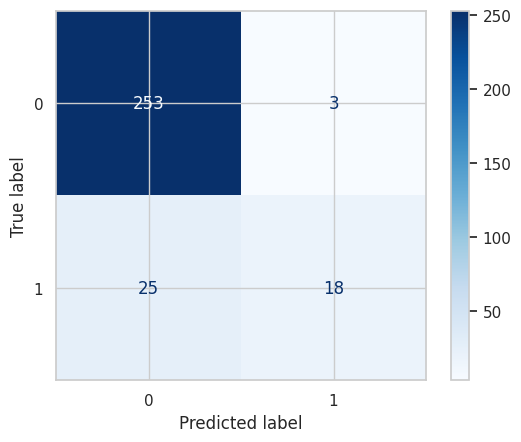

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1️⃣ Create confusion matrix
cm = confusion_matrix(y, y_pred)

# 2️⃣ Display it visually
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues', values_format='d')

AHORA RESTECG

In [ ]:
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier
from imblearn.over_sampling import SMOTE

# Define the new target
target_col = 'restecg'

# Filter complete cases for this target
df_target = df_encoded[df_cleaned[target_col].notnull()].copy()

# Remove other columns with missing values
columns_with_missing = ['trestbps', 'chol', 'thalch', 'oldpeak', 'ca',
                        'fbs', 'restecg', 'exang', 'slope', 'thal']
other_missing = [col for col in columns_with_missing if col != target_col]

# Define X and y
X = df_target.drop(columns=other_missing + [target_col])
y = df_target[target_col]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=42)

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Mostrar top 5 modelos
models.head()

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 197, number of negative: 187
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000150 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 49
[LightGBM] [Info] Number of data points in the train set: 384, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.513021 -> initscore=0.052095
[LightGBM] [Info] Start training from score 0.052095
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
DecisionTreeClassifier,0.78,0.78,0.78,0.78,0.07
XGBClassifier,0.77,0.78,0.78,0.77,0.30
ExtraTreesClassifier,0.76,0.76,0.76,0.76,0.78
RandomForestClassifier,0.75,0.76,0.76,0.75,0.51
ExtraTreeClassifier,0.75,0.76,0.76,0.75,0.09


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score

# 1️⃣ Base model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# 2️⃣ Hiperparámetros a probar
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 4, 5, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.5]
}

# 3️⃣ RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=30,
    scoring=make_scorer(f1_score, average='macro'),  # 'macro' para varias clases
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# 4️⃣ Entrenar con los datos balanceados
random_search.fit(X_resampled, y_resampled)

# 5️⃣ Mostrar resultados
print("🔧 Best hyperparameters:")
print(random_search.best_params_)

print(f"\n🏆 Best F1 Score: {random_search.best_score_:.4f}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
🔧 Best hyperparameters:
{'subsample': 1.0, 'n_estimators': 200, 'max_depth': 8, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.6}

🏆 Best F1 Score: 0.7866


In [ ]:
# 1️⃣ Entrenar modelo con mejores hiperparámetros
best_xgb_restecg = XGBClassifier(
    n_estimators=200,
    max_depth=8,
    learning_rate=0.2,
    gamma=0,
    subsample=1.0,
    colsample_bytree=0.6,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

best_xgb_restecg.fit(X, y)

# 2️⃣ Predecir sobre los mismos datos
y_pred_restecg = best_xgb_restecg.predict(X)

# 3️⃣ Crear columna con predicciones
df_predicted.loc[y.index, 'restecg_model'] = y_pred_restecg

# 4️⃣ Comparar y calcular % de acierto
comparison = df_predicted.loc[y.index, ['restecg', 'restecg_model']]
matches = (comparison['restecg'] == comparison['restecg_model']).sum()
total = len(comparison)
accuracy = matches / total * 100

print(f"✅ Model agreement with real data: {accuracy:.2f}% ({matches} out of {total})")

✅ Model agreement with real data: 86.62% (259 out of 299)


### **Confusion matrix for the estimation of RestECG values**

---

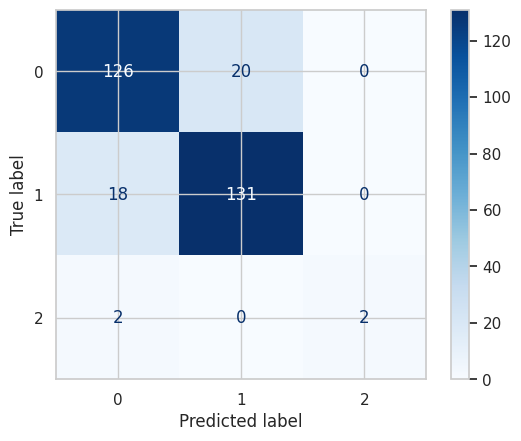

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1️⃣ Matriz de confusión entre valores reales y predichos
cm = confusion_matrix(y, y_pred_restecg)

# 2️⃣ Mostrar matriz con etiquetas de clase
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(y.unique()))
disp.plot(cmap='Blues', values_format='d')

AHORA PARA EXANG

In [ ]:
# 1️⃣ Definir la columna target
target_col = 'exang'

# 2️⃣ Separar X e y (sin eliminar nulos, porque no hay)
X = df_encoded.drop(columns=[target_col])
y = df_encoded[target_col]

# 3️⃣ Mostrar balance de clases original
print("🔎 Class distribution before SMOTE:")
print(y.value_counts(normalize=True))

# 4️⃣ Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 5️⃣ Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=42)

# 6️⃣ Evaluar modelos con LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# 7️⃣ Mostrar los mejores modelos
print("\n✅ Top 5 models for predicting 'exang':")
models.head()

🔎 Class distribution before SMOTE:
exang
0   0.67
1   0.33
Name: proportion, dtype: float64


  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 154, number of negative: 146
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000043 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 334
[LightGBM] [Info] Number of data points in the train set: 300, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.513333 -> initscore=0.053346
[LightGBM] [Info] Start training from score 0.053346
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.88,0.88,0.88,0.88,0.34
KNeighborsClassifier,0.81,0.82,0.82,0.81,0.03
BaggingClassifier,0.82,0.82,0.82,0.82,0.09
RandomForestClassifier,0.82,0.82,0.82,0.82,0.54
SVC,0.82,0.82,0.82,0.82,0.08


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

# 1️⃣ Entrenar modelo con los datos balanceados
extra_trees = ExtraTreesClassifier(random_state=42)
extra_trees.fit(X_resampled, y_resampled)

# 2️⃣ Predecir sobre el dataset original (sin resamplear)
y_pred_exang = extra_trees.predict(X)

# 3️⃣ Crear columna 'exang_model' con predicciones
df_predicted.loc[y.index, 'exang_model'] = y_pred_exang

# 4️⃣ Comparar predicción con valores reales
comparison = df_predicted.loc[y.index, ['exang', 'exang_model']]
matches = (comparison['exang'] == comparison['exang_model']).sum()
total = len(comparison)
accuracy = matches / total * 100

print(f"✅ Model agreement with real data: {accuracy:.2f}% ({matches} out of {total})")


✅ Model agreement with real data: 100.00% (299 out of 299)


* This matrix shows how the model classified both classes of 'exang'.
* With 100% accuracy, we expect a perfect diagonal.


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score
from sklearn.ensemble import ExtraTreesClassifier

# Modelo entrenado con SMOTE ya aplicado
model_exang = ExtraTreesClassifier(random_state=42)

scores_exang = cross_val_score(
    model_exang,
    X_resampled, y_resampled,
    cv=5,
    scoring=make_scorer(f1_score, average='macro')
)

print(f"📊 Cross-validated Macro F1 Score for 'exang': {scores_exang.mean():.4f} (+/- {scores_exang.std():.4f})")


📊 Cross-validated Macro F1 Score for 'exang': 0.7809 (+/- 0.0304)


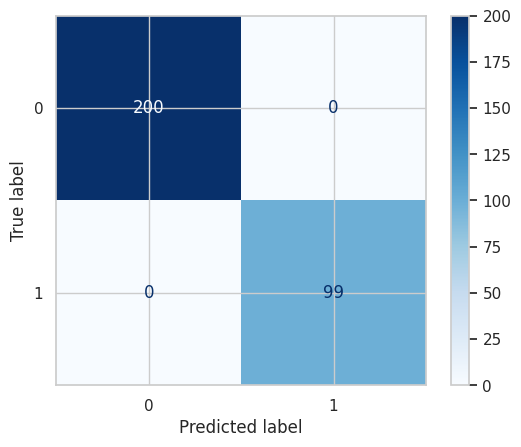

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1️⃣ Matriz de confusión
cm = confusion_matrix(y, y_pred_exang)

# 2️⃣ Visualización
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(y.unique()))
disp.plot(cmap='Blues', values_format='d')


# **SLOPE**

---



In [ ]:
# 1️⃣ Target
target_col = 'slope'

# 2️⃣ Separar X e y
X = df_encoded.drop(columns=[target_col])
y = df_encoded[target_col]

# 3️⃣ Ver distribución de clases original
print("📊 Class distribution of 'slope':")
print(y.value_counts(normalize=True))

# 4️⃣ Aplicar SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 5️⃣ Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=42)

# 6️⃣ Evaluar modelos
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# 7️⃣ Mostrar resultados
print("\n✅ Top models for 'slope':")
models.head()

📊 Class distribution of 'slope':
slope
1   0.46
2   0.46
0   0.07
Name: proportion, dtype: float64


  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000242 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 363
[LightGBM] [Info] Number of data points in the train set: 312, number of used features: 13
[LightGBM] [Info] Start training from score -1.147883
[LightGBM] [Info] Start training from score -1.070174
[LightGBM] [Info] Start training from score -1.079564
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.79,0.78,None,0.79,0.17
RandomForestClassifier,0.78,0.77,None,0.78,0.21
SVC,0.77,0.77,None,0.77,0.02
QuadraticDiscriminantAnalysis,0.74,0.74,None,0.75,0.02
NuSVC,0.74,0.74,None,0.74,0.04


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# 1️⃣ Entrenar el modelo con datos balanceados
model_slope = ExtraTreesClassifier(random_state=42)
model_slope.fit(X_resampled, y_resampled)

# 2️⃣ Predecir sobre el dataset original (X sin resamplear)
y_pred_slope = model_slope.predict(X)

# 3️⃣ Guardar las predicciones en df_predicted
df_predicted.loc[y.index, 'slope_model'] = y_pred_slope

# 4️⃣ Comparar con valores reales
comparison = df_predicted.loc[y.index, ['slope', 'slope_model']]
matches = (comparison['slope'] == comparison['slope_model']).sum()
total = len(comparison)
accuracy = matches / total * 100

print(f"✅ Model agreement with real data: {accuracy:.2f}% ({matches} out of {total})")

✅ Model agreement with real data: 100.00% (299 out of 299)


In [ ]:
# Modelo para slope
model_slope = ExtraTreesClassifier(random_state=42)

scores_slope = cross_val_score(
    model_slope,
    X_resampled, y_resampled,
    cv=5,
    scoring=make_scorer(f1_score, average='macro')
)

print(f"📊 Cross-validated Macro F1 Score for 'slope': {scores_slope.mean():.4f} (+/- {scores_slope.std():.4f})")


📊 Cross-validated Macro F1 Score for 'slope': 0.7809 (+/- 0.0304)


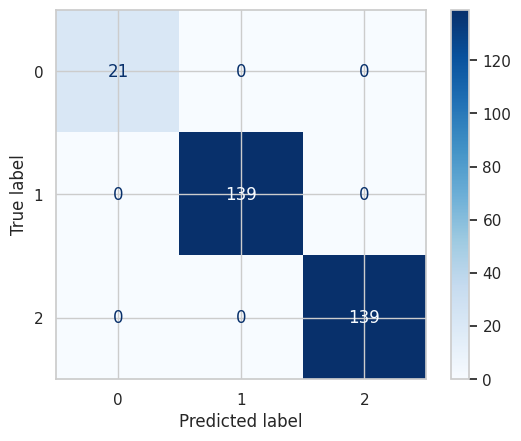

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1️⃣ Matriz de confusión entre valores reales y predichos
cm = confusion_matrix(y, y_pred_slope)

# 2️⃣ Visualización con etiquetas ordenadas
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(y.unique()))
disp.plot(cmap='Blues', values_format='d')


THAL

In [ ]:
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier
from imblearn.over_sampling import SMOTE

# 1️⃣ Definir la variable objetivo
target_col = 'thal'

# 2️⃣ Separar X e y
X = df_encoded.drop(columns=[target_col])
y = df_encoded[target_col]

# 3️⃣ Mostrar distribución de clases
print("📊 Class distribution of 'thal':")
print(y.value_counts(normalize=True))

# 4️⃣ Aplicar SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 5️⃣ Dividir en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=42)

# 6️⃣ Ejecutar LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# 7️⃣ Mostrar top de modelos
print("\n✅ Top models for predicting 'thal':")
models.head()


📊 Class distribution of 'thal':
thal
1   0.55
2   0.39
0   0.06
Name: proportion, dtype: float64


  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000117 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 461
[LightGBM] [Info] Number of data points in the train set: 369, number of used features: 13
[LightGBM] [Info] Start training from score -1.115006
[LightGBM] [Info] Start training from score -1.131673
[LightGBM] [Info] Start training from score -1.050984
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.80,0.81,None,0.81,0.88
RandomForestClassifier,0.80,0.79,None,0.80,0.55
ExtraTreesClassifier,0.79,0.79,None,0.79,0.55
KNeighborsClassifier,0.80,0.79,None,0.79,0.11
LGBMClassifier,0.78,0.78,None,0.78,0.39


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score
import pandas as pd

# 1️⃣ Entrenar y validar el modelo con Cross-Validation
model_thal = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Usamos macro F1 porque 'thal' tiene más de 2 clases
scores = cross_val_score(
    model_thal,
    X_resampled,
    y_resampled,
    cv=5,
    scoring=make_scorer(f1_score, average='macro')
)

print(f"⚖️ Cross-validated Macro F1 Score for 'thal': {scores.mean():.4f} (+/- {scores.std():.4f})")

# 2️⃣ Revisar correlaciones con 'thal' en df_encoded
print("\n🔍 Top correlations with 'thal':")
correlations = df_encoded.corr(numeric_only=True)['thal'].sort_values(ascending=False)
print(correlations.head(10))


⚖️ Cross-validated Macro F1 Score for 'thal': 0.7805 (+/- 0.0522)

🔍 Top correlations with 'thal':
thal       1.00
num        0.35
exang      0.23
sex        0.22
oldpeak    0.21
ca         0.14
chol       0.07
trestbps   0.06
age        0.06
restecg    0.00
Name: thal, dtype: float64


In [ ]:
from xgboost import XGBClassifier

# 1️⃣ Entrenar modelo con datos balanceados
model_thal = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model_thal.fit(X_resampled, y_resampled)

# 2️⃣ Predecir sobre X original
y_pred_thal = model_thal.predict(X)

# 3️⃣ Guardar predicciones en el dataframe
df_predicted.loc[y.index, 'thal_model'] = y_pred_thal

# 4️⃣ Comparar con los valores reales
comparison = df_predicted.loc[y.index, ['thal', 'thal_model']]
matches = (comparison['thal'] == comparison['thal_model']).sum()
total = len(comparison)
accuracy = matches / total * 100

print(f"✅ Model agreement with real data: {accuracy:.2f}% ({matches} out of {total})")


✅ Model agreement with real data: 100.00% (299 out of 299)


# **VARIABLES NUMERICAS**

---



In [ ]:
# 1️⃣ Importar librerías necesarias
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

# 2️⃣ Definir columna objetivo
target_col = 'trestbps'

# 3️⃣ Crear una copia del dataset donde eliminamos la columna target (como si fuera faltante)
df_temp = df_complete.copy()
df_temp = df_temp.drop(columns=[target_col])

# 4️⃣ Definir X (features) e y (target real)
X = df_temp
y = df_complete[target_col]

# 5️⃣ Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6️⃣ Evaluar modelos con LazyRegressor
reg = LazyRegressor(verbose=1, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

# 7️⃣ Mostrar los resultados ordenados
print(models.sort_values("R-Squared", ascending=False).head(10))


  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.11096824629438207, 'Adjusted R-Squared': -0.14027985801372722, 'RMSE': np.float64(16.87207692382533), 'Time taken': 0.20397257804870605}
{'Model': 'BaggingRegressor', 'R-Squared': -0.155288726798275, 'Adjusted R-Squared': -0.48178336698039614, 'RMSE': np.float64(19.23336077409943), 'Time taken': 0.15971159934997559}
{'Model': 'BayesianRidge', 'R-Squared': 0.09264759191097194, 'Adjusted R-Squared': -0.16377808863592724, 'RMSE': np.float64(17.0450354326638), 'Time taken': 0.055637359619140625}
{'Model': 'DecisionTreeRegressor', 'R-Squared': -1.0113020032688018, 'Adjusted R-Squared': -1.5797134389752023, 'RMSE': np.float64(25.377483458110394), 'Time taken': 0.09457135200500488}
{'Model': 'DummyRegressor', 'R-Squared': -0.02119576580626026, 'Adjusted R-Squared': -0.3097945691862902, 'RMSE': np.float64(18.08274728986728), 'Time taken': 0.07110309600830078}
{'Model': 'ElasticNet', 'R-Squared': 0.08039975221221796, 'Adjusted R-Squared': -0.1794872

basura de resultado

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

# 1️⃣ Copiar el dataset limpio
df_temp = df_complete.copy()

# 2️⃣ Codificar automáticamente columnas categóricas con LabelEncoder
for col in df_temp.select_dtypes(include='object').columns:
    encoder = LabelEncoder()
    df_temp[col] = encoder.fit_transform(df_temp[col])

# 3️⃣ Simular falta de la columna a predecir
target_col = 'trestbps'
X = df_temp.drop(columns=[target_col])
y = df_temp[target_col]

# 4️⃣ División train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5️⃣ Entrenar modelo
model = HistGradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# 6️⃣ Predicción
y_pred = model.predict(X_test)

# 7️⃣ Evaluación directa
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5

# 8️⃣ Validación cruzada
cv_r2 = cross_val_score(model, X, y, scoring='r2', cv=5)

# 9️⃣ Resultados
print(f"✅ R2 Score: {r2:.4f}")
print(f"📉 MAE: {mae:.2f}")
print(f"📉 RMSE: {rmse:.2f}")
print(f"🔁 Cross-validated R2 Score: {cv_r2.mean():.4f} (+/- {cv_r2.std():.4f})")


✅ R2 Score: 0.0432
📉 MAE: 13.86
📉 RMSE: 17.50
🔁 Cross-validated R2 Score: -0.1651 (+/- 0.1569)


Esto nos dice que chol no se puede predecir bien usando el resto de las variables. Es decir, su información no está suficientemente contenida en las demás columnas del dataset.

🔍 Quizás chol varíe mucho por factores externos no capturados, como dieta reciente, genética o estrés.

directo a ca...

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

# 1️⃣ Copiar el dataset limpio
df_temp = df_complete.copy()

# 2️⃣ Codificar automáticamente columnas categóricas con LabelEncoder
for col in df_temp.select_dtypes(include='object').columns:
    encoder = LabelEncoder()
    df_temp[col] = encoder.fit_transform(df_temp[col])

# 3️⃣ Simular la falta de la columna a predecir
target_col = 'ca'
X = df_temp.drop(columns=[target_col])
y = df_temp[target_col]

# 4️⃣ División train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5️⃣ Entrenar modelo
model = HistGradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# 6️⃣ Predicción
y_pred = model.predict(X_test)

# 7️⃣ Evaluación directa
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5

# 8️⃣ Validación cruzada
cv_r2 = cross_val_score(model, X, y, scoring='r2', cv=5)

# 9️⃣ Resultados
print(f"✅ R2 Score: {r2:.4f}")
print(f"📉 MAE: {mae:.2f}")
print(f"📉 RMSE: {rmse:.2f}")
print(f"🔁 Cross-validated R2 Score: {cv_r2.mean():.4f} (+/- {cv_r2.std():.4f})")


✅ R2 Score: 0.1973
📉 MAE: 0.55
📉 RMSE: 0.70
🔁 Cross-validated R2 Score: 0.2044 (+/- 0.0689)


CHOL

---



In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

# 1️⃣ Copiar df completo
df_temp = df_complete.copy()

# 2️⃣ Codificar automáticamente columnas categóricas
for col in df_temp.select_dtypes(include='object').columns:
    encoder = LabelEncoder()
    df_temp[col] = encoder.fit_transform(df_temp[col])

# 3️⃣ Simular falta de la columna a predecir
target_col = 'chol'
X = df_temp.drop(columns=[target_col])
y = df_temp[target_col]

# 4️⃣ Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5️⃣ Entrenar modelo
model = HistGradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# 6️⃣ Predicción y evaluación directa
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5


# 7️⃣ Validación cruzada
cv_r2 = cross_val_score(model, X, y, scoring='r2', cv=5)

# 8️⃣ Resultados
print(f"✅ R2 Score: {r2:.4f}")
print(f"📏 MAE: {mae:.2f}")
print(f"📐 RMSE: {rmse:.2f}")
print(f"🔄 Cross-validated R2 Score: {cv_r2.mean():.4f} (+/- {cv_r2.std():.4f})")

✅ R2 Score: -0.1069
📏 MAE: 42.93
📐 RMSE: 51.87
🔄 Cross-validated R2 Score: -0.2488 (+/- 0.2307)


Documentar que la predicción de chol es débil y posiblemente no confiable. ASI QUE LOS SACARÉ CON LA MEDIA.

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

# 1️⃣ Copiar dataset limpio
df_temp = df_complete.copy()

# 2️⃣ Codificar variables categóricas
for col in df_temp.select_dtypes(include='object').columns:
    encoder = LabelEncoder()
    df_temp[col] = encoder.fit_transform(df_temp[col])

# 3️⃣ Definir la columna target y eliminarla de X
target_col = 'thalch'
X = df_temp.drop(columns=[target_col])
y = df_temp[target_col]

# 4️⃣ Separar train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5️⃣ Entrenar modelo
model = HistGradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# 6️⃣ Predicciones
y_pred = model.predict(X_test)

# 7️⃣ Evaluación directa
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5

# 8️⃣ Validación cruzada
cv_r2 = cross_val_score(model, X, y, scoring='r2', cv=5)

# 9️⃣ Resultados
print(f"✅ R2 Score: {r2:.4f}")
print(f"📏 MAE: {mae:.2f}")
print(f"📐 RMSE: {rmse:.2f}")
print(f"🔁 Cross-validated R2 Score: {cv_r2.mean():.4f} (+/- {cv_r2.std():.4f})")


✅ R2 Score: 0.2246
📏 MAE: 15.94
📐 RMSE: 20.00
🔁 Cross-validated R2 Score: 0.2809 (+/- 0.1083)


oldpeak

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

# 1️⃣ Copiar y preparar el dataset limpio
df_temp = df_complete.copy()

# 2️⃣ Codificar columnas categóricas automáticamente
for col in df_temp.select_dtypes(include='object').columns:
    encoder = LabelEncoder()
    df_temp[col] = encoder.fit_transform(df_temp[col])

# 3️⃣ Definir la variable a predecir
target_col = 'oldpeak'
X = df_temp.drop(columns=[target_col])
y = df_temp[target_col]

# 4️⃣ División train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5️⃣ Entrenar el modelo
model = HistGradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# 6️⃣ Predicción
y_pred = model.predict(X_test)

# 7️⃣ Evaluación directa
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5

# 8️⃣ Validación cruzada (CV)
cv_r2 = cross_val_score(model, X, y, scoring='r2', cv=5)

# 9️⃣ Resultados
print(f"✅ R2 Score: {r2:.4f}")
print(f"📉 MAE: {mae:.2f}")
print(f"📐 RMSE: {rmse:.2f}")
print(f"🔄 Cross-validated R2 Score: {cv_r2.mean():.4f} (+/- {cv_r2.std():.4f})")

✅ R2 Score: 0.1797
📉 MAE: 0.72
📐 RMSE: 0.94
🔄 Cross-validated R2 Score: 0.1668 (+/- 0.1435)
